<a href="https://colab.research.google.com/github/hirokimituya/stock-price-analysis/blob/main/technical_analysis/%E6%A0%AA%E4%BE%A1%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas_datareader.data as pdr

# 株価データを取得するメソッド
def get_stock_data(code):
    """株価データを取得する

    :param code: 取得する株価データの銘柄コード
    :return: 株価データのデータフレーム
    """
    df = pdr.DataReader(f'{code}.JP', 'stooq').sort_index()
    return df

<Axes: xlabel='Date'>

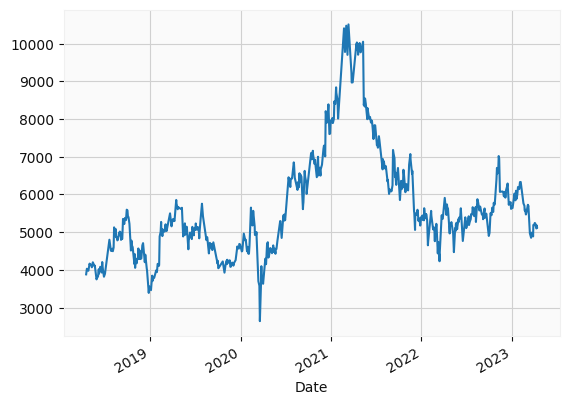

In [72]:
#　ソフトバンクの株価データ取得
df = get_stock_data(9984)
df['Close'].plot()

### 高値と安値で差が大きいデータが多いほど、短期間での売買で利益を出しやすい銘柄であると判断できる


In [73]:
# 高値と安値の差が300円以上の株価データ
df.query('High - Low >= 300').tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-08,6655.0,6997.0,6650.0,6929.0,33680300.0
2022-11-14,6353.0,6453.0,5956.0,6068.0,40860800.0
2022-11-16,6090.0,6400.0,6090.0,6328.0,32497500.0
2022-11-18,6355.0,6363.0,6044.0,6075.0,25586100.0
2022-12-20,6038.0,6041.0,5715.0,5726.0,16122200.0


In [74]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ローソク足チャートを描画する

In [75]:
# コロワイドの株価データを取得
df = get_stock_data(7616)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-07,1970.0,1994.0,1965.0,1974.0,306600
2023-04-10,1976.0,1995.0,1975.0,1994.0,274200
2023-04-11,2002.0,2035.0,2002.0,2035.0,461500
2023-04-12,2040.0,2070.0,2040.0,2067.0,296200
2023-04-13,2058.0,2059.0,2024.0,2043.0,315300


In [76]:
import mplfinance as mpf
import datetime as dt

# ローソク足と出来高を表示するメソッド
def show_plot(code, start, end, show_volume=True, mas=[], width=2, height=1, period=None):
    """ローソク足や移動平均線のチャートを表示する

    :param code: 取得する株価データの銘柄コード
    :param start: 取得する株価データの開始日
    :param end: 取得する株価データの終了日
    :param show_volume: チャートに出来高を表示するかどうかのブール値
    :param mas: チャートに移動平均線を表示するためのリスト（例: [5, 25, 75]）
    :param width: チャートの幅（縦横比）
    :param height: チャートの高さ（縦横比）
    :param period: 表示するチャートの期間をどの単位でまとめるか（'M' or 'W'）
    """
    # 株価データの取得
    df = get_stock_data(code)

    # 月足、周足にリサンプリング
    if period in ('M', 'W'):
        resampled = df.resample(period)
        df = resampled.aggregate({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})
    
    # 移動平均線の算出
    for ma in mas:
        df[f'ma{ma}'] = df['Close'].rolling(window=ma).mean()

    # 日付で絞り込み
    cdf = df[start:end]

    # 移動平均線をチャートに表示するための準備（合わせてチャートに表示するラベル名のリストも作成する）
    colors = ['blue', 'green', 'red']
    apd = []
    labels = []
    for ma, color in zip(mas, colors):
        apd.append(mpf.make_addplot(cdf[f'ma{ma}'], color=color))
        labels.append(f'ma{ma}'.upper())

    # 描画情報を取得
    fig, axes = mpf.plot(cdf, type='candle', figratio=(width, height), volume=show_volume, style='yahoo', addplot=apd, returnfig=True)

    # ラベルを追加
    axes[0].legend(labels)

    # チャートを表示
    fig.show()

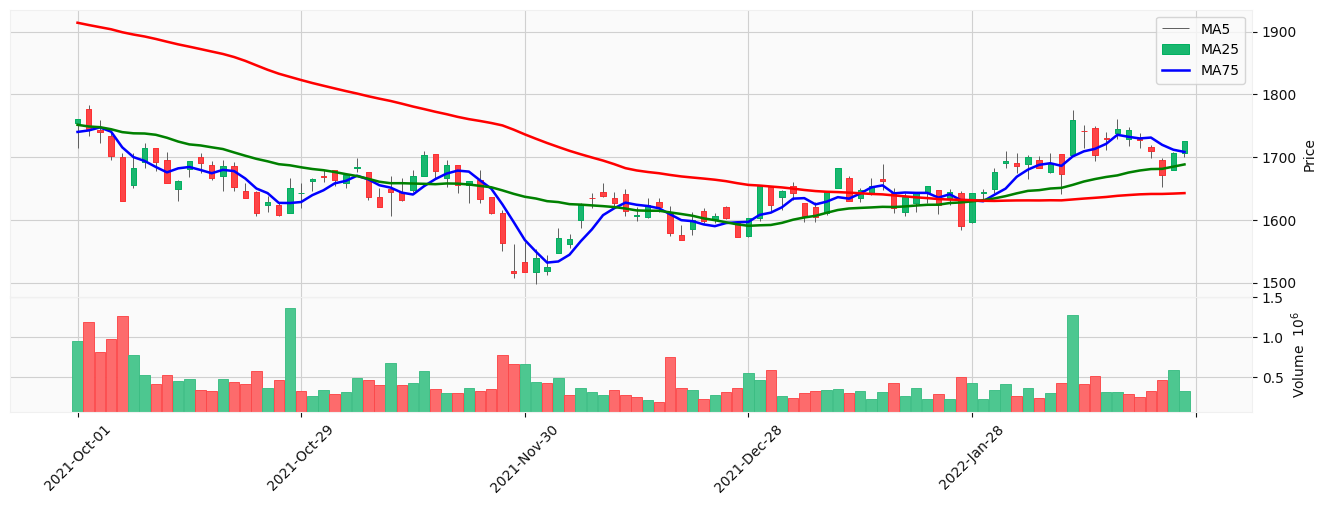

In [80]:
# 周足ローソク足チャートの表示
show_plot(7616, '2021-10-1', '2022-2-28', mas=[5, 25, 75], width=3)